# Polynomial Regression

# Bluff Detector using Polnomial regression

Motive : Business scenario: Human Resources team is about to hire a new employee in the company. During the salary negotiation process,a potential employee candidate tells he has 20+ years of experience (it corresponds to the level 6.5 in the given dataset) and earned 160,000 annual salary in his previous company. Therefore, he is asking now for at least more than 160,000. 
One of the HRs decides to check this info. To do this he has the only data set about ten different positions and salaries in 
the candidate’s previous company. You, as a data scientist helping HR, have to build a regression model and to predict if this
new candidate employee is bluffing about his salary or not. You have to build this bluffing detector by using a polynomial
regression for the Pos_Sal.csv file.

# Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the dataset

In [5]:
df = pd.read_csv('E:/sakshi/all subjects of MS/Trimester 6/Predictive Analytics/Class 3/Pos_Sal.csv')

# View of data

In [6]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


# Statistical term of data

In [8]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


# Null Values in dataset

In [9]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

# Segregating data into dependent and independent variables

In [10]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Training the Linear Regression model on the whole dataset


In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Visualising the Linear Regression results

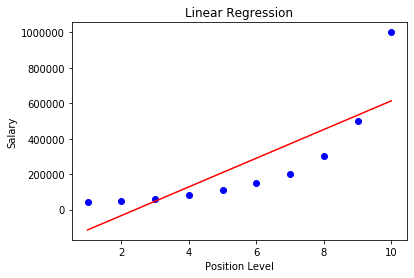

In [20]:
plt.scatter(X, y,color = 'blue')
plt.plot(X, lin_reg.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Polynomial Regression

In statistics, polynomial regression is a form of regression analysis in which the relationship test between the independent 
variable x and the dependent variable y is modelled as an nth degree polynomial in x.
For this reason, polynomial regression is considered to be a special case of multiple linear regression.

# Fitting polynomial regression with 2,3,4 degrees

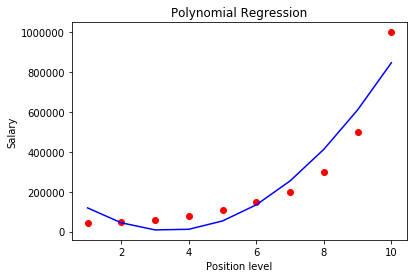

Degree =  2
Coefficient =  [      0.         -132871.21212121   19431.81818182]
Intercept =  232166.6666666664
R_score =  0.9162082221443942


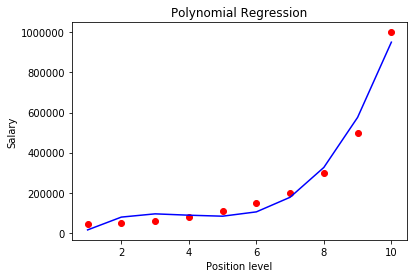

Degree =  3
Coefficient =  [     0.         180664.33566432 -48548.95104895   4120.04662005]
Intercept =  -121333.3333333116
R_score =  0.9812097727913367


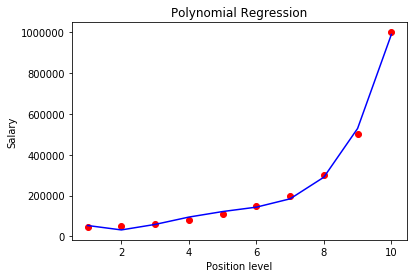

Degree =  4
Coefficient =  [      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]
Intercept =  184166.66666719737
R_score =  0.9973922891706614


In [14]:
from sklearn.preprocessing import PolynomialFeatures
degree = [2,3,4]
for i in degree:
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X)
    lin_reg.fit(X_poly, y)
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Polynomial Regression')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    print("Degree = ", i)
    print("Coefficient = ", lin_reg.coef_)
    print("Intercept = ", lin_reg.intercept_)
    print("R_score = ", lin_reg.score(X_poly,y))
    

We can see that increasing the degree of a polynomial will improve the in-sample fit up to a point.When i used degree =4 the
curve came very nice and fit on data points.

# Predicting a new result with Linear Regression

In [21]:
#Predicting a new result with Linear Regression
lin_reg.predict([[6.5]])

array([330378.78787879])

# Predicting a new result with Polynomial Regression

In [210]:
lin_reg.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

# Conclusion 

In a company during the salary negotiation process,a potential employee candidate tells he has 20+ years of experience (it corresponds to the level 6.5 in the given dataset) and earned 160,000 annual salary in his previous company. Therefore,I decided to build (bluff detector)a regression model and to predict so when used multiple linear regression  which gives us wrong prediction (330378.78787879) ,and when i used polynomial regression it's gives us right prediction approximately that employee earning annual salary 158862.45265155 (~158 K)in his previous company.